## Loading datasets
## splitting datasets & droping unnecessary columns

In [1]:
import pandas as pd

test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

y_train = train.iloc[:, 1]

X_train = train.drop(columns = ['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'])
X_test = test.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'])

## checking if a particular column contains NaN values or irrelevant data

In [8]:
print(set(X_train['Embarked']))

{'C', 'S', nan, 'Q'}


## counting number of times an unique item occured in a particular column

In [9]:
print(X_train['Embarked'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


## visualizing the number of times an unique item occured in a particular column by plotting barchart

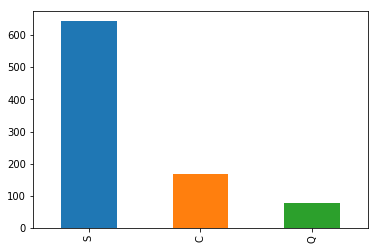

In [10]:
X_train['Embarked'].value_counts().plot(kind='bar')

## filling Embarked column's NaN values using forwardfill method. similarly replacing Age column's NaN values by putting a zero

In [21]:
X_train['Embarked'].fillna(method = 'ffill', inplace = True)
X_test['Embarked'].fillna(method = 'ffill', inplace = True)
X_test['Fare'].fillna(method = 'bfill', inplace = True)

X_train['Age'].fillna(0, inplace = True)
X_test['Age'].fillna(0, inplace = True)

## replacing Age column's zero values. 
## used a loop to iterate each elements of the column.
## if iterated item is non zero value then the value will be append in a new list.
## if iterated item is zero then it does some simple calculation and append the calculated value to the list.
# calculation:
## if first item is zero then it follows backwardfill method.
## if last item is zero then it follows forwardfill method.
## else it calculate the average value using it's privious item and next item

In [13]:
trainAge = []
for i in range(len(X_train['Age'])):
    if X_train['Age'][i] == 0:
        previous_i, next_i = i - 1, i + 1
        trainAge.append((X_train['Age'][previous_i] + X_train['Age'][next_i])/2.0)
    else:
        trainAge.append(X_train['Age'][i])
        
        
        
testAge = []
for i in range(len(X_test['Age'])):
    if i == len(X_test['Age'])-1:
        if X_test['Age'][i] == 0:
            testAge.append(X_test['Age'].values.mean())
    else:
        if X_test['Age'][i] == 0:
            previous_i, next_i = i - 1, i + 1
            testAge.append((X_test['Age'][previous_i] + X_test['Age'][next_i])/2.0)
        else:
            testAge.append(X_test['Age'][i])

## dropping the old Age column and adding calculated new Age column to the datasets

In [14]:
X_train = X_train.drop(columns = ['Age'])
X_test = X_test.drop(columns = ['Age'])

X_train['Age'] = trainAge
X_test['Age'] = testAge

## converting categorical values into numeric values

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train['Sex'] = le.fit_transform(X_train['Sex'])
X_train['Embarked'] = le.fit_transform(X_train['Embarked'])
X_test['Sex'] = le.fit_transform(X_test['Sex'])
X_test['Embarked'] = le.fit_transform(X_test['Embarked'])

## applying feature scaling

In [22]:
from sklearn.preprocessing import StandardScaler
import numpy as np
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

## predicting test dataset's result using Support Vector Classifier

In [23]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

## saving the result for further use

In [141]:
new_df = pd.DataFrame()
new_df['PassengerId'] = [i for i in range(892, 1310)]
new_df['Survived'] = y_pred
new_df.to_csv('new.csv', index = False)

# Improving model:
## applying grid search to find parameters of support vector classifier which will give best accuracy score

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10], 'kernel': ['linear']},
              {'C': [.1, .2, .3, .4, .5, 1, 10], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.4, 0.6, 0.7, 0.8]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_